In [1]:
from funkcje import gpu

Hyperparametry


In [2]:
from hyperparam import Args     

args = Args()

DANE:

In [3]:
from funkcje import get_nb_files

print ('Train dataset contains {} samples ({} steps / epoch)'.format(args.nb_train_samples, args.train_steps))
print ('Valid dataset contains {} samples ({} steps / epoch)'.format(args.nb_valid_samples, args.valid_steps))
print ('Dataset contains {} classes ({}).'.format(args.nb_classes, args.classes))

Train dataset contains 15707 samples (490 steps / epoch)
Valid dataset contains 5236 samples (163 steps / epoch)
Dataset contains 10 classes (['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']).


In [4]:
args.classes

['butterfly',
 'cat',
 'chicken',
 'cow',
 'dog',
 'elephant',
 'horse',
 'sheep',
 'spider',
 'squirrel']

Generatory/Preprocessing

In [5]:
from dataaug import train, valid

train_generator = train()
validation_generator = valid()

Found 15707 images belonging to 10 classes.
Found 5236 images belonging to 10 classes.


Testowe wyswietlenie obrazkow po preprocessingu
:

In [ ]:
from funkcje import wyswPrzyklad

wyswPrzyklad(train_generator, args.classes)

Tworzenie modelu:

In [7]:
from model import utworzModel
model = utworzModel()

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 149, 149, 64)      832       
                                                                 
 separable_conv2d (Separable  (None, 149, 149, 64)     4736      
 Conv2D)                                                         
                                                                 
 batch_normalization (BatchN  (None, 149, 149, 64)     256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 149, 149, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                        

In [10]:
history = model.fit(
    train_generator,
    epochs = 70,
    validation_data=validation_generator,
)

Epoch 1/70
491/491 [==============================] - 104s 205ms/step - loss: 2.1106 - accuracy: 0.2480 - val_loss: 2.0370 - val_accuracy: 0.2678
Epoch 2/70
491/491 [==============================] - 99s 202ms/step - loss: 1.7535 - accuracy: 0.3981 - val_loss: 1.6618 - val_accuracy: 0.4269
Epoch 3/70
491/491 [==============================] - 98s 200ms/step - loss: 1.5008 - accuracy: 0.4874 - val_loss: 1.6107 - val_accuracy: 0.4635
Epoch 4/70
491/491 [==============================] - 98s 200ms/step - loss: 1.3694 - accuracy: 0.5360 - val_loss: 1.4317 - val_accuracy: 0.5285
Epoch 5/70
491/491 [==============================] - 98s 200ms/step - loss: 1.2494 - accuracy: 0.5741 - val_loss: 1.4339 - val_accuracy: 0.5380
Epoch 6/70
491/491 [==============================] - 98s 200ms/step - loss: 1.1738 - accuracy: 0.6044 - val_loss: 1.3302 - val_accuracy: 0.5573
Epoch 7/70
491/491 [==============================] - 98s 200ms/step - loss: 1.1174 - accuracy: 0.6241 - val_loss: 1.3155 - val_a

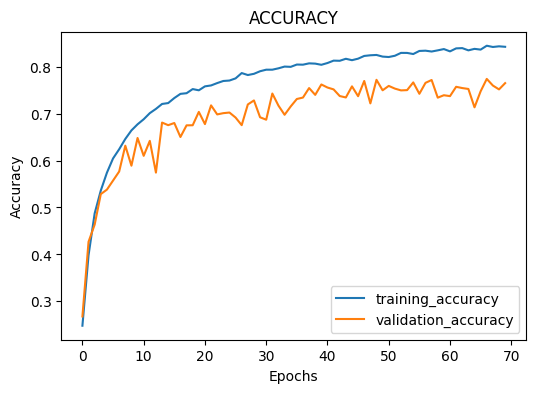

In [11]:
from funkcje import wyswWykres

wyswWykres(history, 'acc')

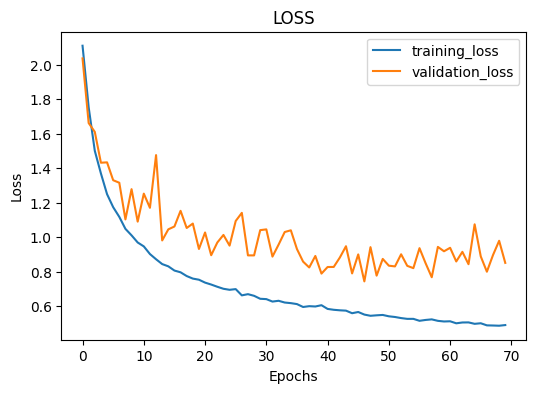

In [12]:
wyswWykres(history, 'loss')

1/1 [==============================] - 0s 310ms/step


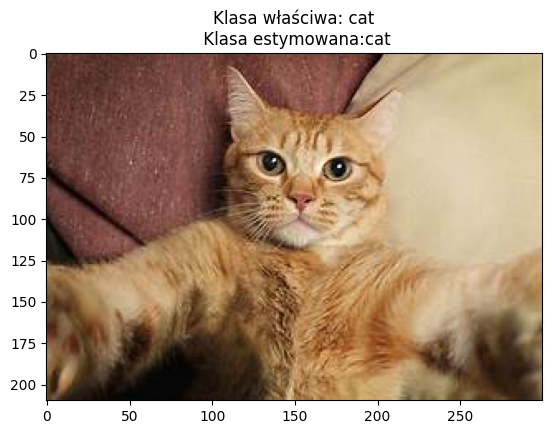

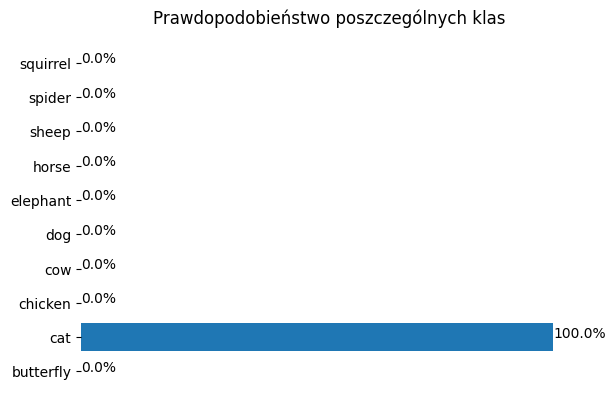

In [13]:
from funkcje import sprawdzKlase

IMAGE_PATH='C:/Users/yamrc/animals/test/cat/1.jpeg'

sprawdzKlase(IMAGE_PATH, model, args.classes)

1/1 [==============================] - 0s 17ms/step


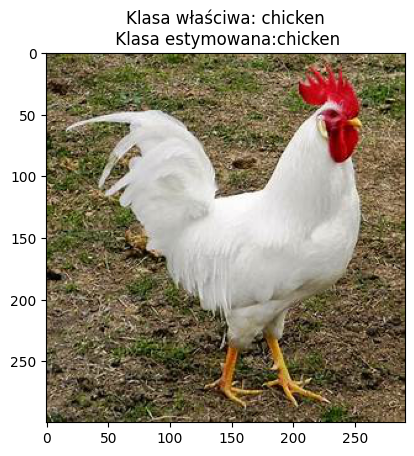

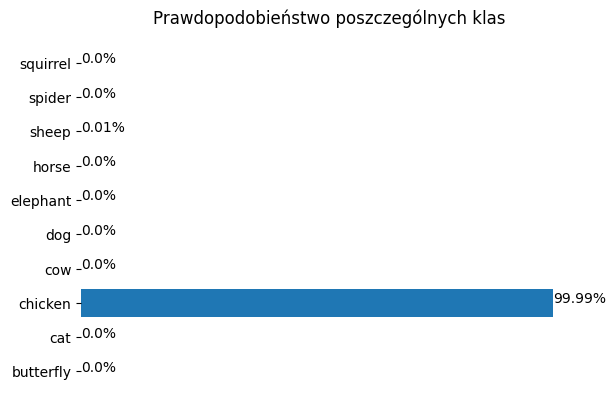

In [14]:
IMAGE_PATH='C:/Users/yamrc/animals/test/chicken/10.jpeg'

sprawdzKlase(IMAGE_PATH, model, args.classes)

1/1 [==============================] - 0s 17ms/step


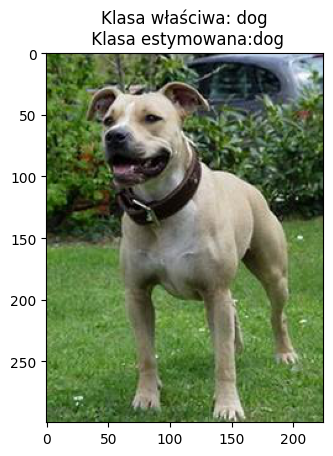

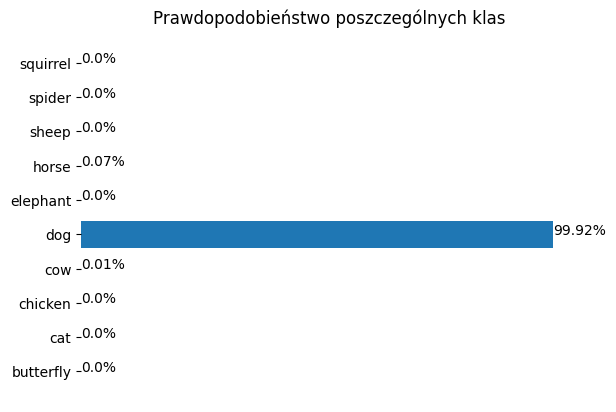

In [15]:
IMAGE_PATH='C:/Users/yamrc/animals/test/dog/OIP-ZrIsvFlFHBxLA_Ng9l-0DQHaJ4.jpeg'

sprawdzKlase(IMAGE_PATH, model, args.classes)

1/1 [==============================] - 0s 17ms/step


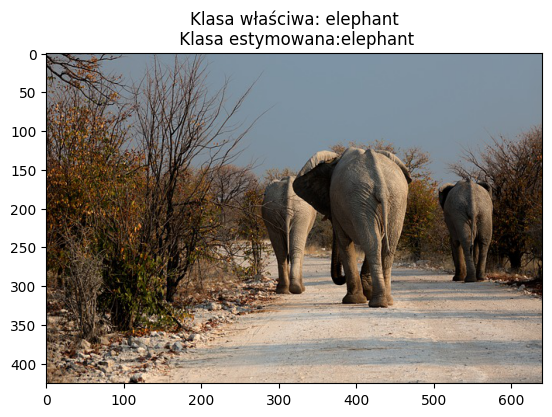

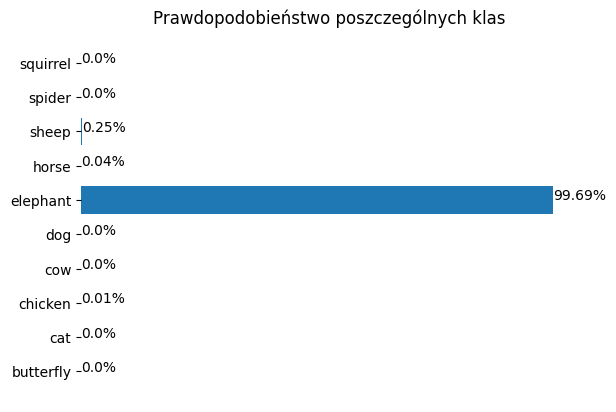

In [18]:
IMAGE_PATH='C:/Users/yamrc/animals/test/elephant/e83cb00a2ef1083ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg'

sprawdzKlase(IMAGE_PATH, model, args.classes)

1/1 [==============================] - 0s 18ms/step


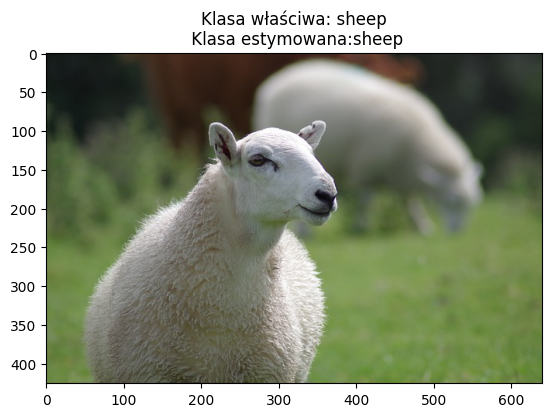

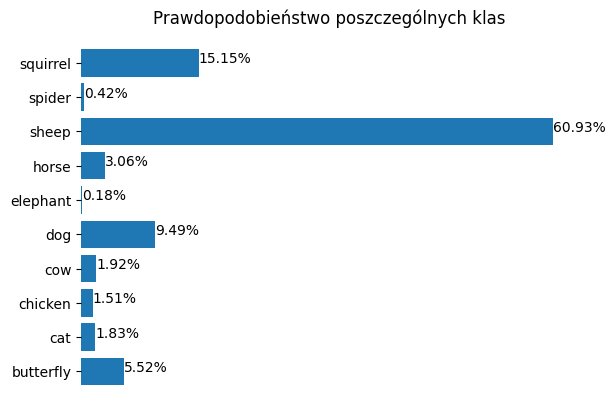

In [19]:
IMAGE_PATH='C:/Users/yamrc/animals/test/sheep/e13cb60a2bfc1c22d2524518b7444f92e37fe5d404b0144390f8c078a1ebb2_640.jpg'

sprawdzKlase(IMAGE_PATH, model, args.classes)

1/1 [==============================] - 0s 17ms/step


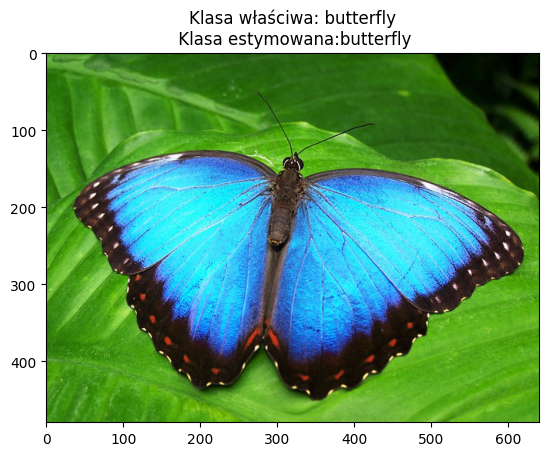

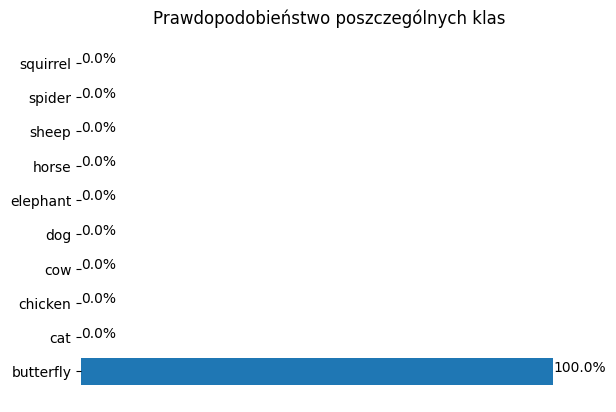

In [22]:
IMAGE_PATH='C:/Users/yamrc/animals/test/butterfly/e831b30a28f21c22d2524518b7444f92e37fe5d404b0144390f8c770a3e5b7_640.jpg'

sprawdzKlase(IMAGE_PATH, model, args.classes)

In [16]:
model.save('model')

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets
